<a href="https://colab.research.google.com/github/Asmapatel21/Bike-sharing-demand-prediction/blob/main/Regression_indivisual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name :- Bike Sharing Demand Prediction.**

# Project Type - EDA

Github link -
https://github.com/Asmapatel21

# **Problem Statement :-**
Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

# **Project Summary:-**

Bike Sharing Demand Prediction project was done by group of 5 members -Tabassum patel,Shubham Kodape,Asma patel,Anuja ghotekar,Pratiksha Auti. We started on working on csv data individually.As dataset was quite big enough which led more computation time.we felt little challenging when we start working on different algorithms choosing quite number of algorithms to work upon .Also deciding about the best model for prediction. Then we decided to divide Regression important topics among 5 and started exploring data set. Pratiksha- Check the description (overall and column) ,check the null value,treat null value,or go with mean,median or mode according to need. Anuja- check and treat outliers.Either remove them (if they are less in number),Use some techniques. Shubham- Go for distribution checking ,treat distribution.It can be right skewed or left.Check model by fitting all data without doing any transformation and check accuracy in both cases. Asma - Check the correlation and treat if it is high.Heatmap or corr()Treat -either merge two columns or drop one imp column. Tabassum- Model creation part.Linear regression,Non linear model.Implement hyper parameter tuning. After all this process we got EDA insights and Result of ML models , All 4 models have been explained with the help of SHAP library.

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import skew
%matplotlib inline

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')

# **Dataset Loading**

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Dataset First Look**


In [ ]:
# Dataset First Look
bike_sharing_df = pd.read_csv('/content/SeoulBikeData.csv',encoding='unicode_escape')
bike_sharing_df=pd.read_csv('/content/SeoulBikeData.csv',encoding='unicode_escape')

df1 =bike_sharing_df.copy()

# **Checking correlation for feature removal :-**

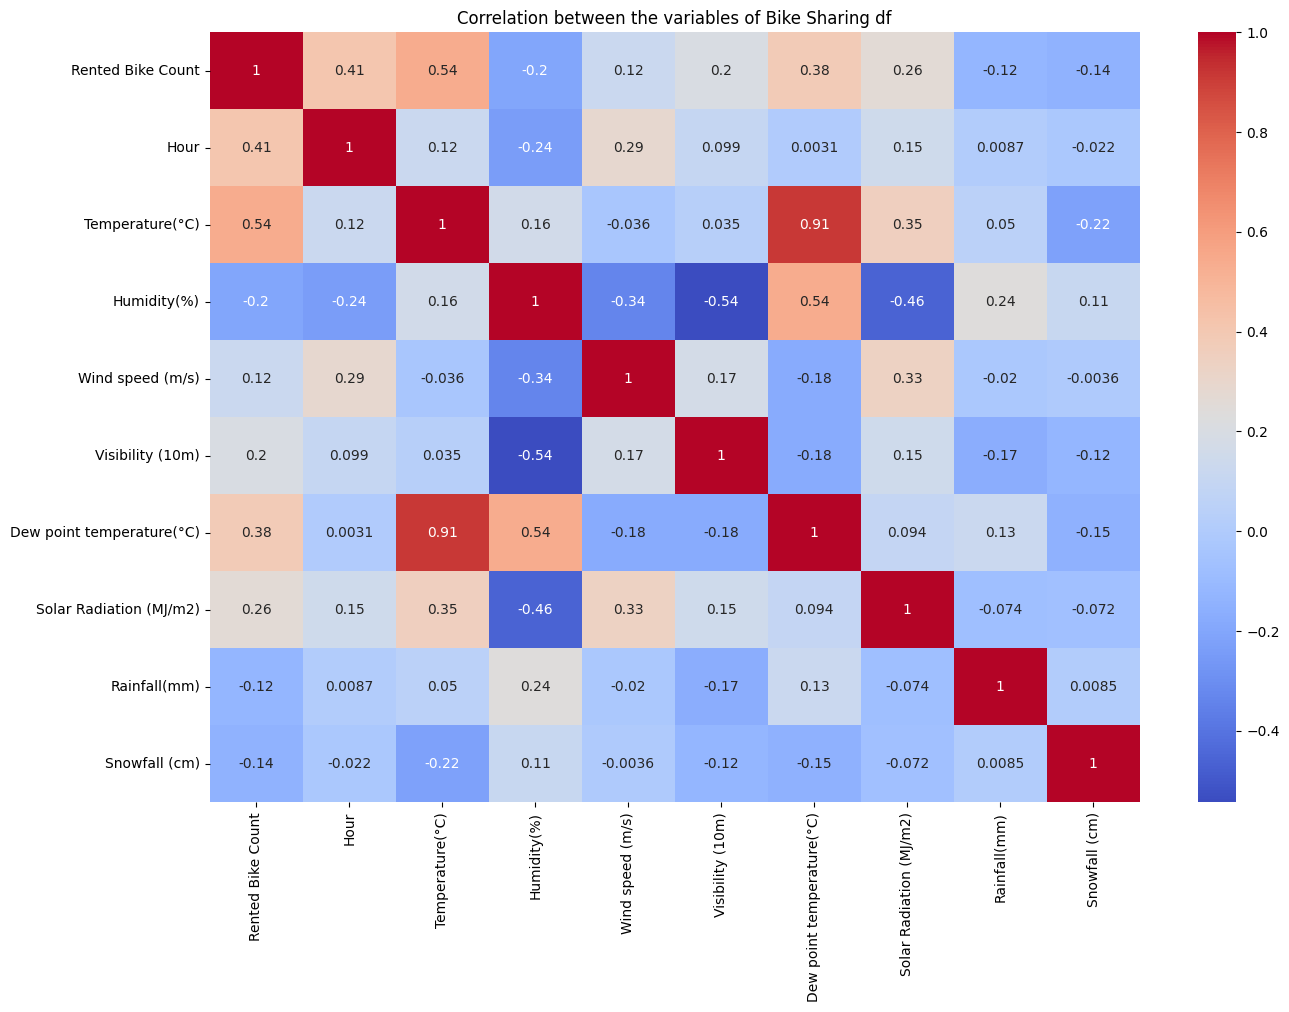

In [ ]:
#Plotting correlation matrix using sns.heatmap
corr_matrix = df1.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation between the variables of Bike Sharing df')
plt.show()

The Dew point temperature column is highly correlated to the Temperature column and therefore we can remove it and it most likely won't affect our model building much, so we will drop the dew point temperature column.

I will also remove the date column because I don't think it adds any value

In [ ]:
#Dropping unnecessary columns
bike_sharing_df.drop(columns={'Dew point temperature(°C)','Date'},axis=1,inplace=True)

# **Removing Multicollinearity:**

Multicollinearity is when two independent variables are highly correlated to each other.

Multicollinearity affects the accuracy of the regression models, and therefore we will check if we have multicollinearity in our dataset and solve it by removing columns which cause multicollinearity

In [ ]:
#Creating a list of independent columns
idv_cols = list(set(bike_sharing_df.columns)-{'Rented Bike Count'})

Now that we don't have any variable with VIF>10 we can move ahead.

# **Obtaining correlation between independent and dependent variables :**

We will use a regression plot to find this correlation. This also finds if the independent variable has a linear relationship with the dependent variable, which is an assumption that has to be satisfied for models like linear regression

**Checking in OLS Model**

Ordinary least squares (OLS) regression is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable

# Heatmap
we check correletion betweeen variables using Correlation heatmap, it is graphical representation of correlation matrix representing correlation between different variables

<Axes: >

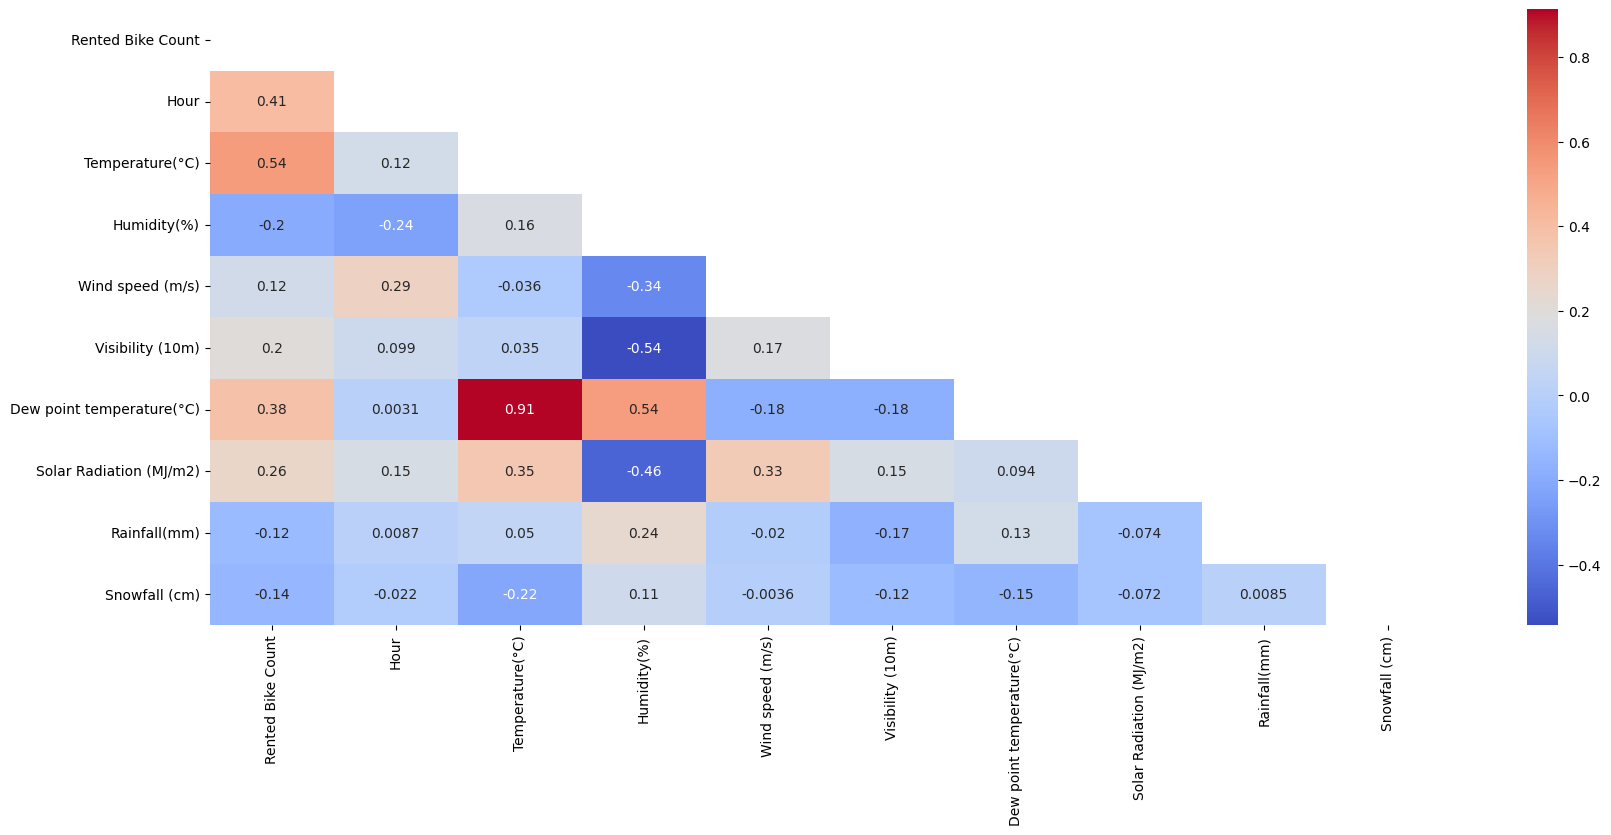

In [ ]:
## plot the Correlation matrix
plt.figure(figsize=(20,8))
correlation=df1.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap((correlation),mask=mask, annot=True,cmap='coolwarm')

We can observe on the heatmap that on the target variable line the most positively correlated variables to the rent are :

the temperature
the dew point temperature
the solar radiation
And most negatively correlated variables are:

Humidity
Rainfall


From the above correlation heatmap, We see that there is a positive correlation between columns 'Temperature' and 'Dew point temperature' i.e 0.91 so even if we drop this column then it dont affects the outcome of our analysis. And they have the same variations.. so we can drop the column 'Dew point temperature(°C)'